<a href="https://colab.research.google.com/github/AlaxSwum/Machine-Learning-Projects/blob/main/House_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np


# Importing Dataset

In [ ]:
df = pd.read_csv('Housing.csv')

# Cleaning and Analysing the Dataset

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Finding the dimension of Dataset
df.shape

(545, 13)

In [ ]:
# finding the null value in each column
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# Finding duplicated rows
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
  print("No duplicate rows found.")
else:
  print("Duplicate rows found.")

No duplicate rows found.


In [ ]:
# Statistical Summary Transposition
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


# Step3 : Data Analysis

In [ ]:
# Importing Libraries for Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Step4 : Visualizing the Dataset

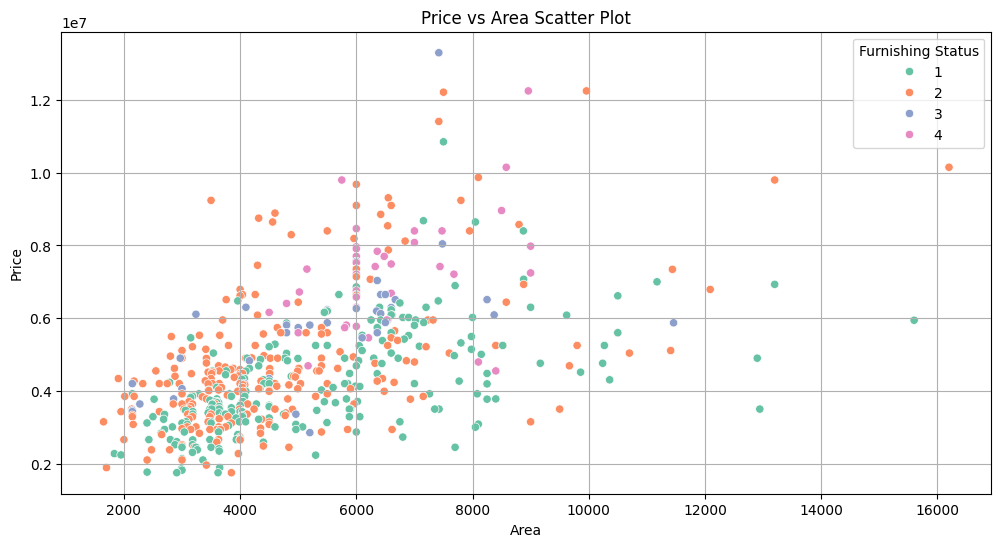

In [ ]:
# Visualizing Price vs Area
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Hot water heating')

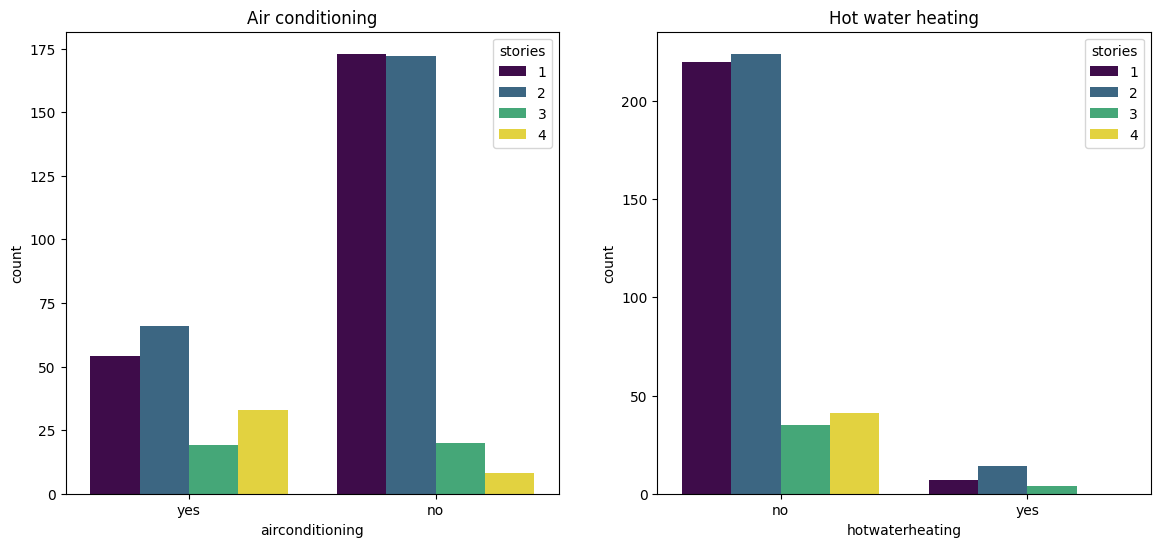

In [ ]:
# Visualizing Airconditioning and Hot water heating
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the first countplot on the first subplot (axs[0])
sns.countplot(x=df["airconditioning"], hue=df["stories"], palette="viridis", ax=axs[0])

# Plot the second countplot on the second subplot (axs[1])
sns.countplot(x=df["hotwaterheating"], hue=df["stories"], palette="viridis", ax=axs[1])

# Optionally, add titles to the subplots
axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

<Axes: xlabel='basement', ylabel='None'>

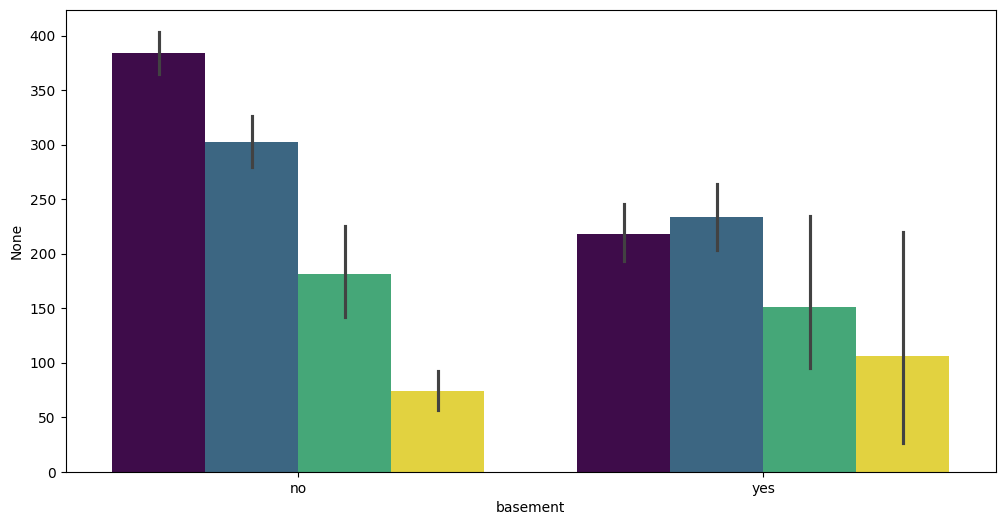

In [ ]:
# Visualizing the base and stories
plt.figure(figsize=(12, 6))
sns.barplot(x=df["basement"], y=df["stories"].index, hue=df["stories"], palette="viridis", legend=False)


<ipython-input-200-1ffc4189e742>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
<ipython-input-200-1ffc4189e742>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
<ipython-input-200-1ffc4189e742>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
<ipython-input-200-1ffc4189e742>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

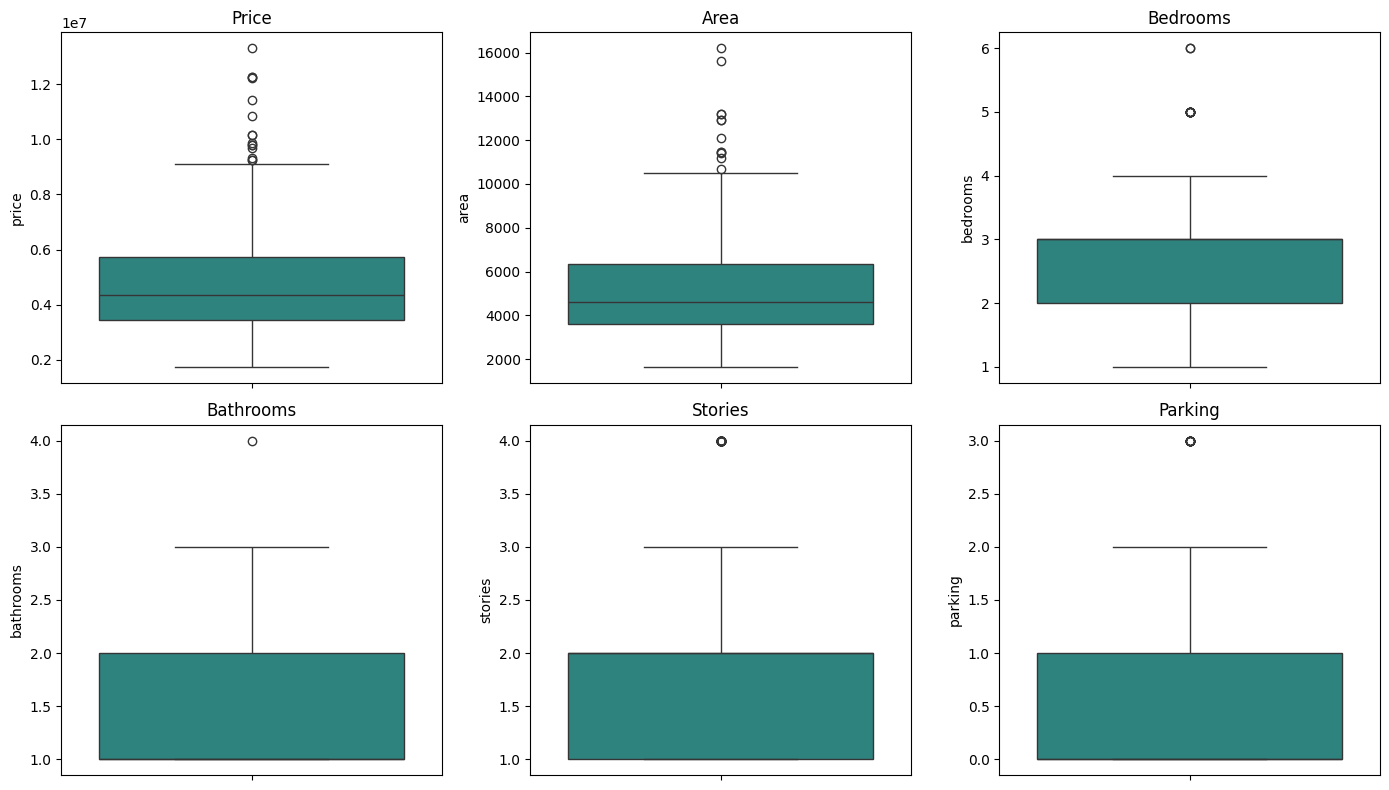

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of column names you want to plot
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

counter = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
        axs[i, j].set_title(columns[counter].capitalize())
        counter += 1

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

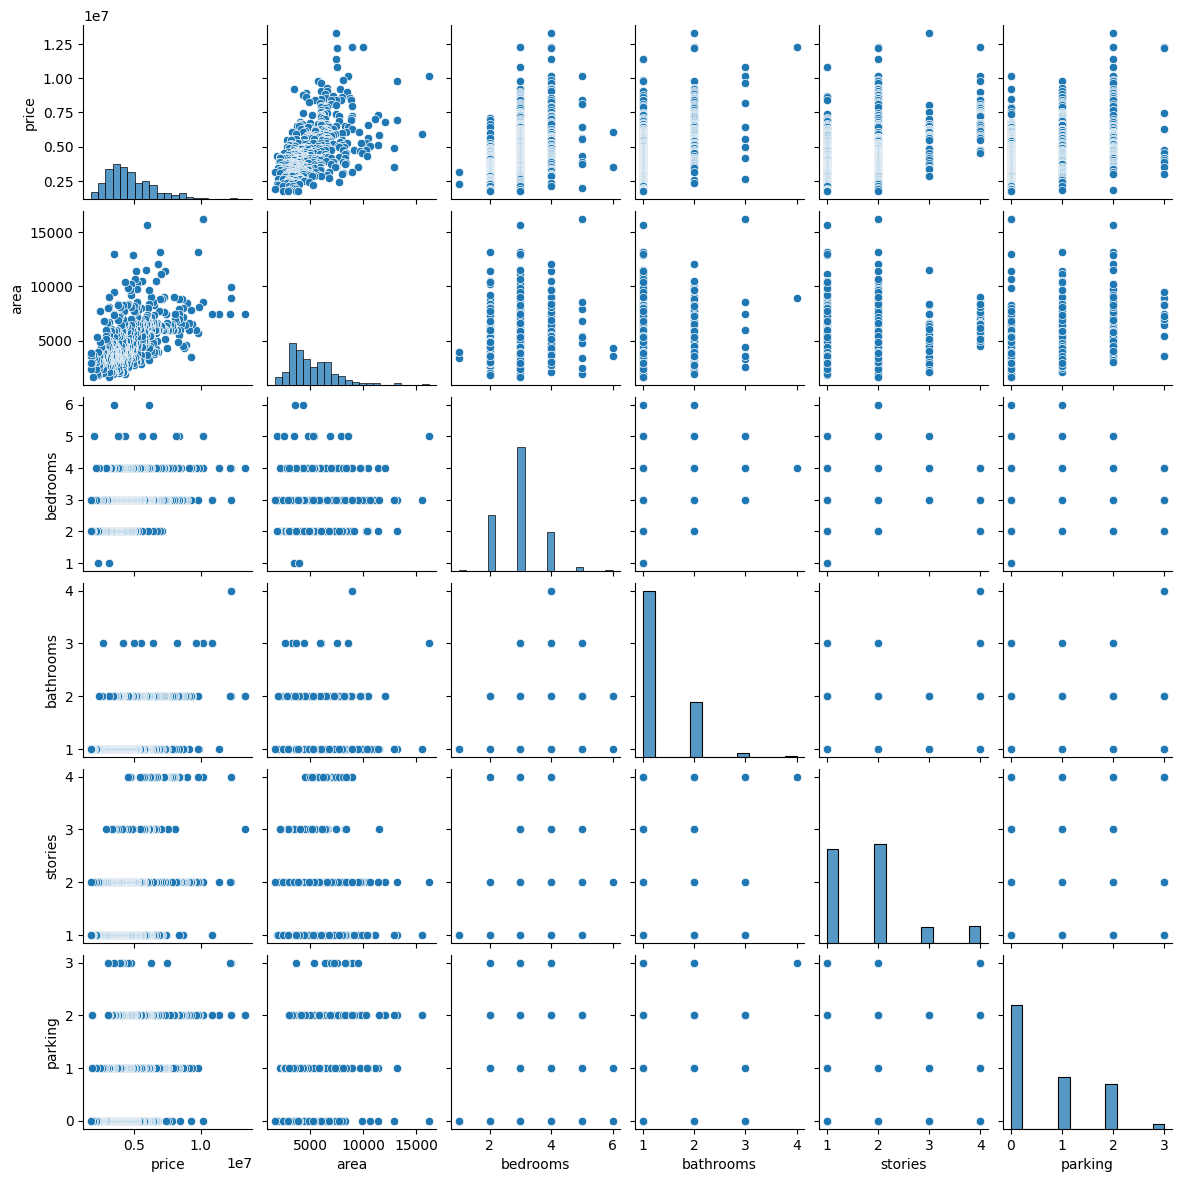

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(df, diag_kind="hist", height=2)
plt.show()

# Data Preprocessing

In [ ]:
# Importing Encoding Libraries
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Checking Null Values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
# Converting Boolean value into numerical boolean value
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes': 1, 'no': 0}).astype(int)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df['furnishingstatus']=LabelEncoder().fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# Spliting the data set into training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df[['area']]  # Using double brackets to ensure X is a DataFrame with only one column
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Reshape X_train and X_test to be 2-dimensional arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Scaling the dataset

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Scale the dataset
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)


## Training the training dataset with simple Linear Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train_scale, y_train)


LinearRegression()

# Predicting the dataset

In [ ]:
# Make predictions
y_pred = regressor.predict(X_test_scale)


# Visualization the training set

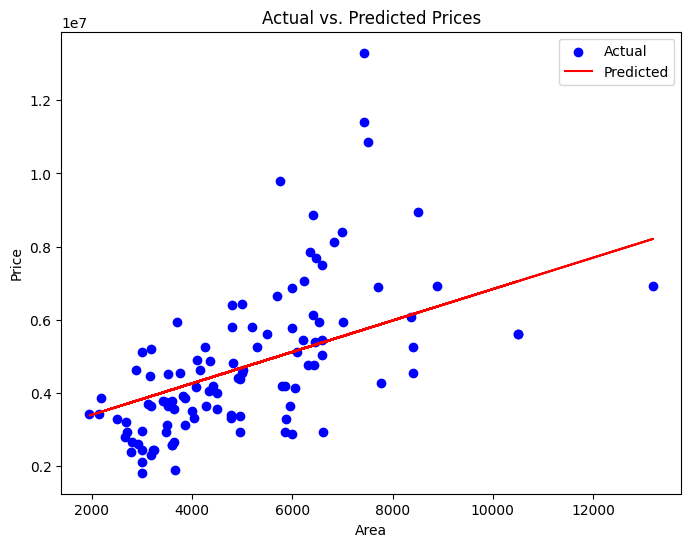

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

# Evaluating the Model Performance

In [ ]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2820642384250.131


# Modeling the dataset using Multiple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df contains multiple features including 'area'
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

X = df['area']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Predicting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df contains multiple features including 'area'
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1602773742288.0


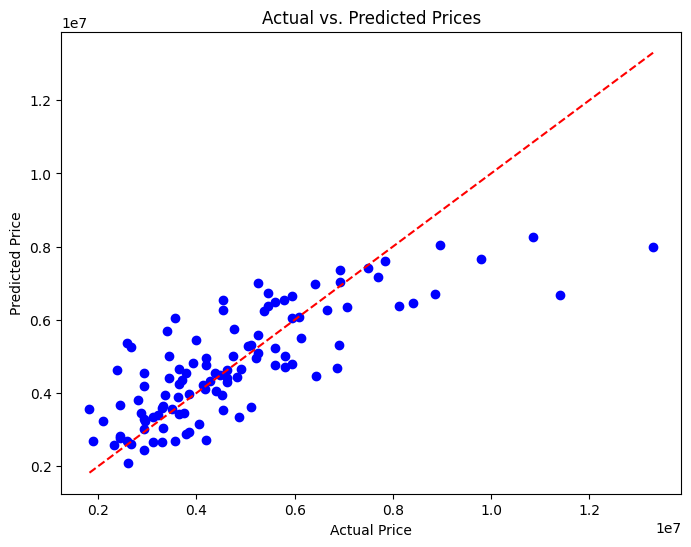

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()